# Pretrained Segmentation models predict images

# Bash
使用命令行快速实现推理

## Dataset : cityscapes

In [1]:
# segformer + cityscapes
!python3 ./B_pretrained_models_for_images.py

# output : pred_street_uk

[2023-09-17 22:34:06,100] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)
/home/wmy/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/home/wmy/anaconda3/lib/python3.9/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/wmy/anaconda3/lib/python3.9/site-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by http backend from p

In [2]:
# BiSeNet + cityscapes
!python3 ./B_pretrained_models_for_images.py --model_name BiSeNetV2 --config_file ./mmsegmentation/configs/bisenetv2/bisenetv2_fcn_4xb4-160k_cityscapes-1024x1024.py --checkpoint_file https://download.openmmlab.com/mmsegmentation/v0.5/bisenetv2/bisenetv2_fcn_4x4_1024x1024_160k_cityscapes/bisenetv2_fcn_4x4_1024x1024_160k_cityscapes_20210902_015551-bcf10f09.pth

[2023-09-17 22:34:14,443] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)
/home/wmy/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/home/wmy/anaconda3/lib/python3.9/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/wmy/anaconda3/lib/python3.9/site-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(
Loads checkpoint by http backend from p

# whole process

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pylab as plt
import argparse

import torch
import mmcv
from mmseg.apis import init_model, inference_model, show_result_pyplot

[2023-09-17 22:34:21,613] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/wmy/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


## load models

### ADE20K

### Cityscapes

In [4]:
# 模型 config 配置文件
config_file = './mmsegmentation/configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py'
# 模型 checkpoint
checkpoint_file = 'https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth'

### Customized dataset

### load models

In [5]:
device = 'cuda:0' if torch.cuda.is_available else 'cpu'
model = init_model(config=config_file, checkpoint=checkpoint_file, device=device)

/home/wmy/anaconda3/lib/python3.9/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/wmy/anaconda3/lib/python3.9/site-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth


## inference stage

### data

(1500, 2250, 3)


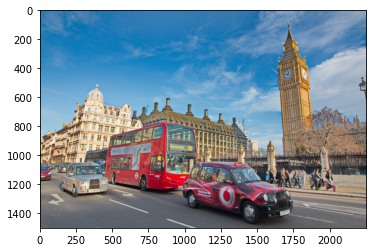

In [6]:
img_path = './data/street_uk.jpeg'
img_bgr = cv2.imread(img_path)
print(img_bgr.shape)

plt.imshow(img_bgr[:,:,::-1])
plt.show()

### inference

In [7]:
result = inference_model(model, img_bgr)

# result information
print('result key: ', result.keys())

# result class
print('result shape: ', result.pred_sem_seg.data.shape)

print('result class: ', np.unique(result.pred_sem_seg.data.cpu()))

# 置信度
result.seg_logits.data.shape, result.pred_sem_seg.data

result key:  ['seg_logits', 'pred_sem_seg']
result shape:  torch.Size([1, 1500, 2250])
result class:  [ 0  1  2  3  4  5  6  7  8 10 11 13 15]


(torch.Size([19, 1500, 2250]),
 tensor([[[10, 10, 10,  ..., 10, 10, 10],
          [10, 10, 10,  ..., 10, 10, 10],
          [10, 10, 10,  ..., 10, 10, 10],
          ...,
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0]]], device='cuda:0'))

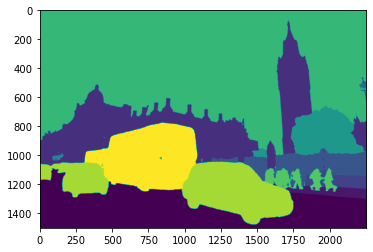

In [8]:
pred_mask = result.pred_sem_seg.data[0].detach().cpu().numpy()

plt.imshow(pred_mask)
plt.show()

### visualization

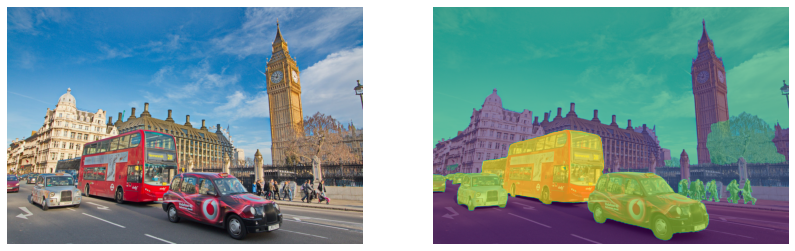

In [9]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.imshow(img_bgr[:,:,::-1])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_bgr[:,:,::-1])
plt.imshow(pred_mask, alpha=0.6) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.savefig('./outputs/pred_street_uk.jpg')
plt.show()

### visualization

In [10]:
from mmseg.apis import show_result_pyplot

img_viz = show_result_pyplot(model, img_path, result, opacity=0.8, title='MMSeg', out_file='outputs/B2-2.jpg')

img_viz.shape

/home/wmy/anaconda3/lib/python3.9/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


(1500, 2250, 3)

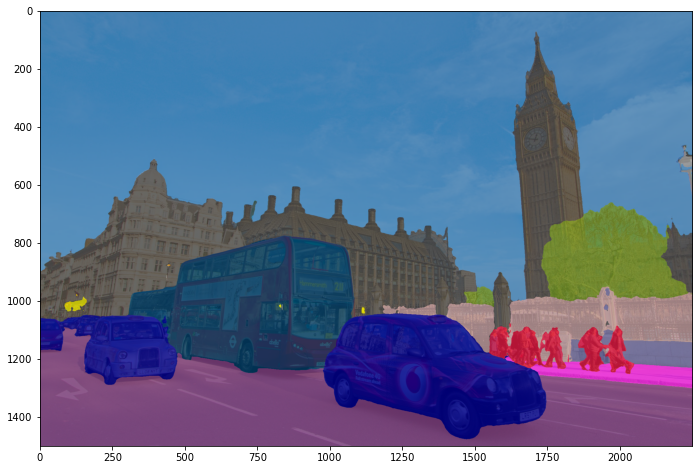

In [11]:
plt.figure(figsize=(14, 8))
plt.imshow(img_viz)
plt.show()